<a href="https://colab.research.google.com/github/ranjanchoubey/ml2/blob/main/assignment-1/Q1-Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre>
Name : Ranjan Kumar Choubey
Class : M.Tech CS 2023-25
Roll No : CS2316
</pre>

![heading](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/heading.png)


![Problem 1](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q1.1.png)


**Ans : -** **Denoising Autoencoder** (DAE) is a type of neural network that helps to find useful patterns in data.
- It is often used to reduce the number of features or to learn important features.

-  The key idea behind a Denoising Autoencoder is to train the network to reconstruct the original input from a corrupted version of it.

- This process forces the network to learn robust features that can capture the underlying structure of the data, even in the presence of noise.


## **Pseudocode for Denoising Autoencoder Training**



---
**Step 1:** Initialize the Autoencoder Model
- Define the function $f_{\theta}$ representing the autoencoder with parameters $\theta$.

**Step 2:** Define the Loss Function
- Define the loss function $\mathcal{L}$ as Mean Squared Error (MSE):
$$
\mathcal{L}(\hat{x}, x) = \frac{1}{N} \sum_{i=1}^{N} (\hat{x}_i - x_i)^2
$$

**Step 3:** Define the Optimizer
- Use the Adam optimizer to update parameters $\theta$:
$$
\theta \leftarrow \theta - \eta \nabla_{\theta} \mathcal{L}
$$

**Step 4:** Set the Number of Epochs and Batch Size
- Let $N$ be the number of epochs and $B$ be the batch size.

**Step 5:** Training Loop
1. For each epoch $n$ from 1 to $N$:
   - For each batch of data $\{x_i\}_{i=1}^{B}$:
     - Add noise to the input data to create a corrupted version:
     $$
     \tilde{x} = x + \text{noise}
     $$
     - Forward pass:
     $$
     \hat{x} = f_{\theta}(\tilde{x})
     $$
     - Compute the loss:
     $$
     \mathcal{L}(\hat{x}, x) = \frac{1}{B} \sum_{i=1}^{B} (\hat{x}_i - x_i)^2
     $$
     - Backward pass:
     $$
     \nabla_{\theta} \mathcal{L}
     $$
     - Update the model parameters:
     $$
     \theta \leftarrow \theta - \eta \nabla_{\theta} \mathcal{L}
     $$
**Step 6:** Evaluate the Model (Optional)
- Evaluate the model on a validation set using the same approach as in the training loop.

---

![q1.2.png](https://github.com/ranjanchoubey/ml2/blob/main/assignment-1/assets/q1.2.png?raw=1)

**Solution :**

### **Step 0**: Data Preparation


In [7]:
# Import Necessary Libraries
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
# Define transformations for the dataset
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the MNIST dataset
train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
test_set = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=tensor_transform)

# Create DataLoader for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=32, shuffle=True)

---

### **Step 1:** Initialize the Autoencoder Model

- We define a function $ f_{\theta} $ representing the autoencoder, where $ \theta $ are the parameters (weights and biases) of the model. The autoencoder consists of two main components: the encoder and the decoder.
  
  - **Encoder:** Maps the input \( x \) to a latent representation \( z \):
  $$
  z = f_{\text{encoder}}(x; \theta_{\text{encoder}})
  $$
  
  - **Decoder:** Maps the latent representation \( z \) back to the reconstructed input \( \hat{x} \):
  $$
  \hat{x} = f_{\text{decoder}}(z; \theta_{\text{decoder}})
  $$


In [9]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Define the encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Define the decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = DenoisingAutoencoder()
model

DenoisingAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

---
### **Step 2:** Define the Loss Function
- The loss function \( \mathcal{L} \) is defined as the Mean Squared Error (MSE):
$$
\mathcal{L}(\hat{x}, x) = \frac{1}{N} \sum_{i=1}^{N} (\hat{x}_i - x_i)^2
$$
where:
- $ \hat{x}$  is the reconstructed output from the decoder.
- $ x $ is the original input.
- $N$ is the number of samples in the batch.

The goal of training is to minimize this loss function, which measures the difference between the original and reconstructed images.


In [10]:
criterion = nn.MSELoss()
criterion

MSELoss()

---
### **Step 3:** Define the Optimizer

-Since Adam combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp, So We use the Adam optimizer to update the parameters $ \theta $:
$$
\theta \leftarrow \theta - \eta \nabla_{\theta} \mathcal{L}
$$
where:
- $ \eta $ is the learning rate.
- $ \nabla_{\theta} \mathcal{L} $ is the gradient of the loss with respect to the parameters $ \theta $.




In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

---
### **Step 4:** Set the Number of Epochs and Batch Size

- Let    

  $ N $ : number of epochs (complete passes through the training dataset)



In [12]:
patch_size = 8
num_epochs = 30

---
### **Step 5:** Training Loop


1. For each epoch $ n $ from 1 to $ N $:
   - For each batch of data $ \{x_i\}_{i=1}^{B} $:
     - Add noise to the input data to create a corrupted version:
     $$
     \tilde{x} = x + \text{noise}
     $$
     where $ \text{noise} $ is a random perturbation added to the input.
   - Forward pass:
   $$
   \hat{x} = f_{\theta}(\tilde{x})
   $$
   - Compute the loss:
   $$
   \mathcal{L}(\hat{x}, x) = \frac{1}{B} \sum_{i=1}^{B} (\hat{x}_i - x_i)^2
   $$
   - Backward pass:
   $$
   \nabla_{\theta} \mathcal{L}
   $$
   - Update the model parameters:
   $$
   \theta \leftarrow \theta - \eta \nabla_{\theta} \mathcal{L}
   $$

Epoch [1/30], Loss: 0.0302


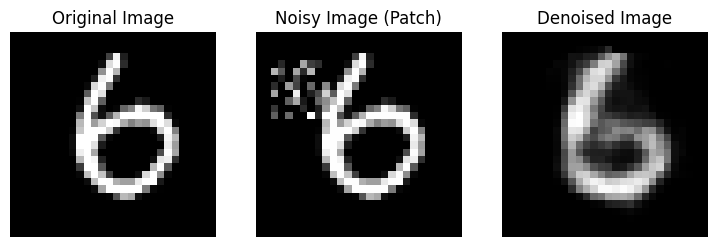

Epoch [2/30], Loss: 0.0207


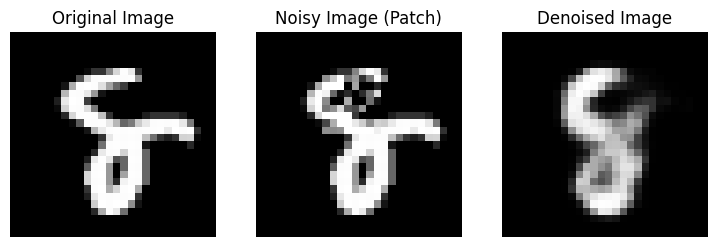

Epoch [3/30], Loss: 0.0172


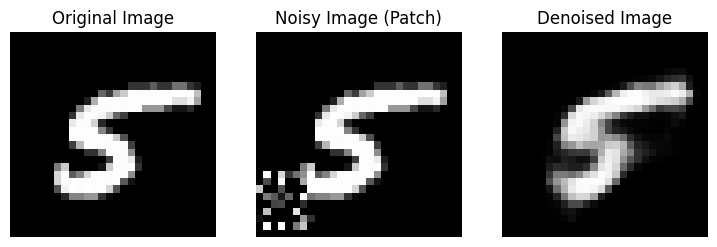

Epoch [4/30], Loss: 0.0168


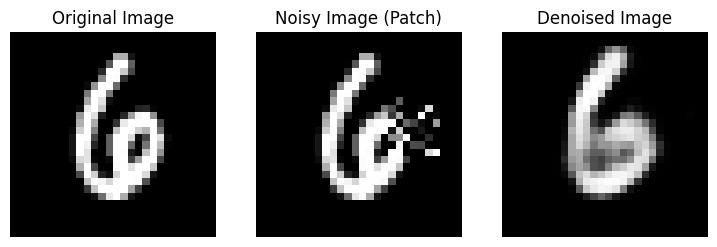

Epoch [5/30], Loss: 0.0161


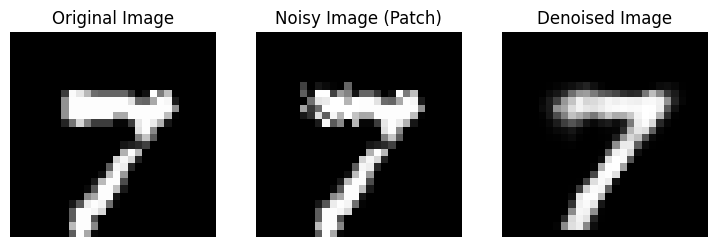

Epoch [6/30], Loss: 0.0162


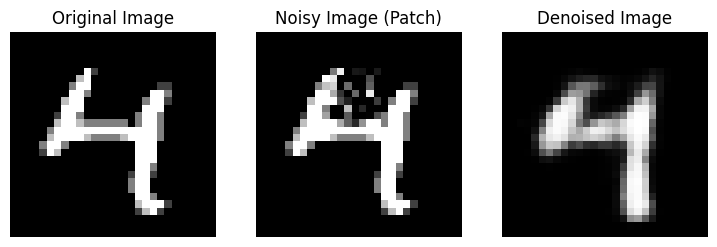

Epoch [7/30], Loss: 0.0121


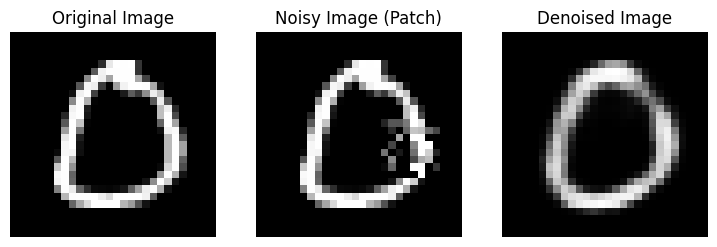

Epoch [8/30], Loss: 0.0147


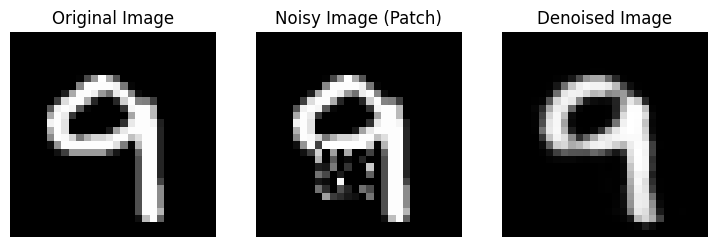

Epoch [9/30], Loss: 0.0122


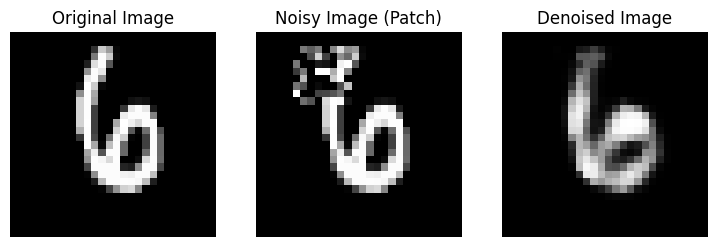

Epoch [10/30], Loss: 0.0137


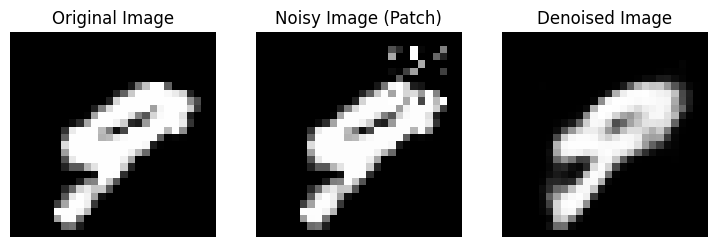

Epoch [11/30], Loss: 0.0128


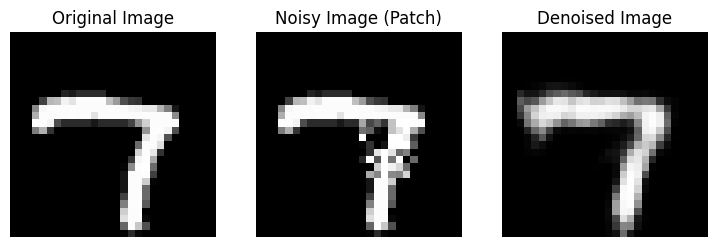

Epoch [12/30], Loss: 0.0131


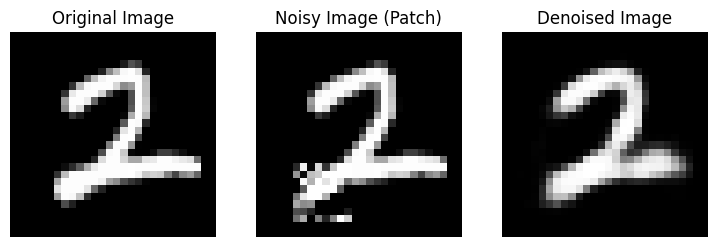

Epoch [13/30], Loss: 0.0138


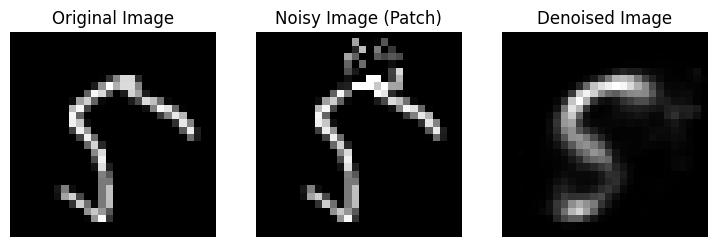

Epoch [14/30], Loss: 0.0123


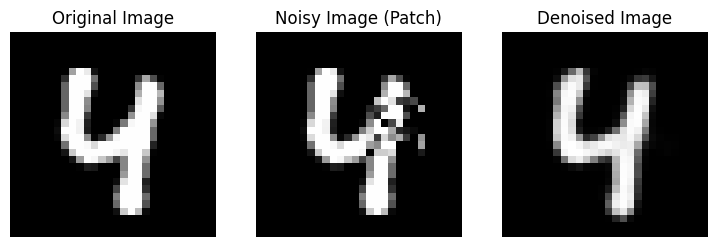

Epoch [15/30], Loss: 0.0131


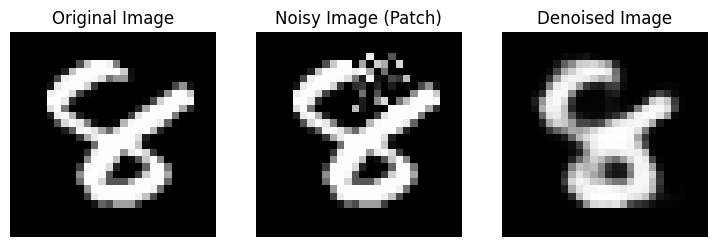

Epoch [16/30], Loss: 0.0095


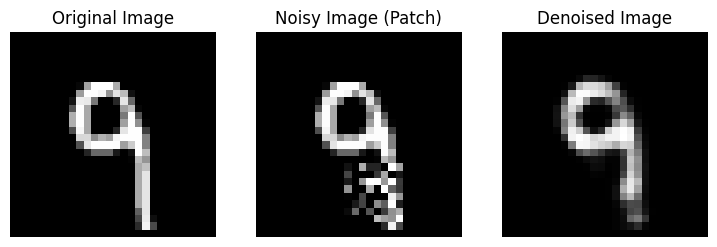

Epoch [17/30], Loss: 0.0130


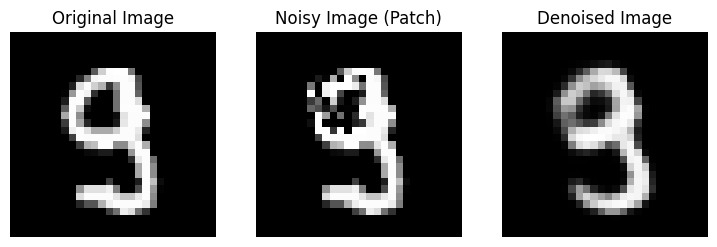

Epoch [18/30], Loss: 0.0114


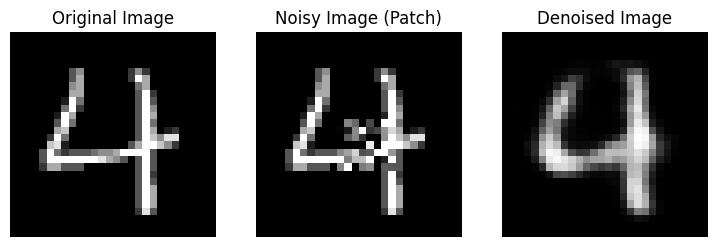

Epoch [19/30], Loss: 0.0100


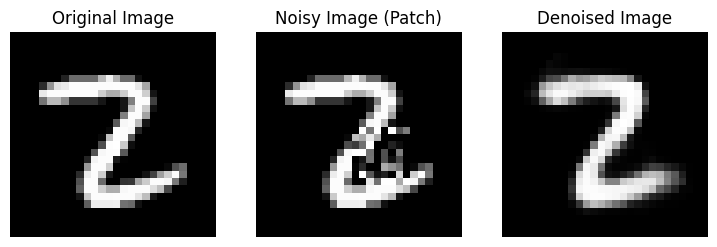

Epoch [20/30], Loss: 0.0092


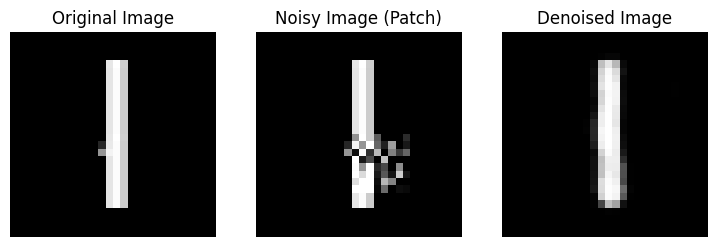

Epoch [21/30], Loss: 0.0095


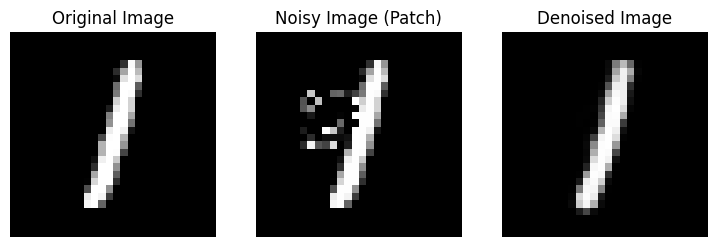

Epoch [22/30], Loss: 0.0095


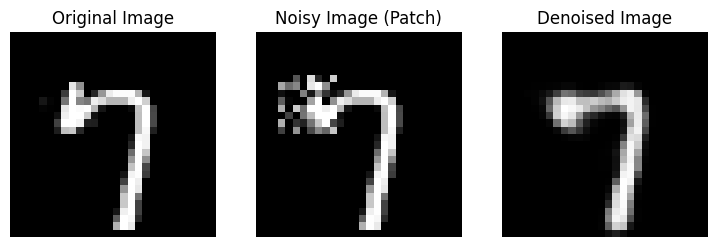

Epoch [23/30], Loss: 0.0096


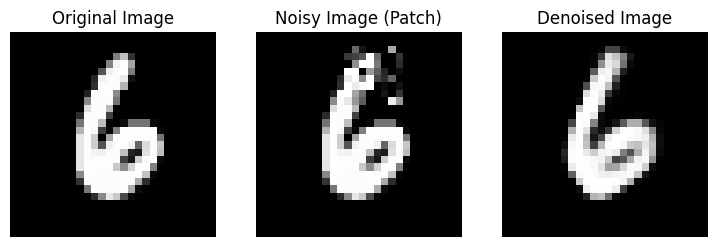

Epoch [24/30], Loss: 0.0097


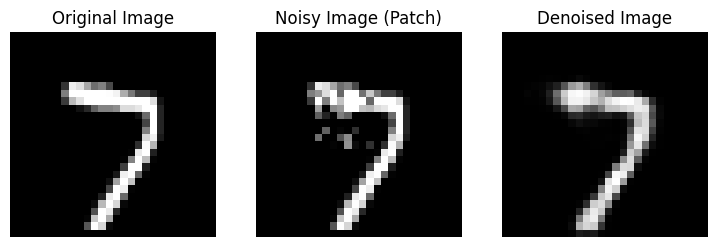

Epoch [25/30], Loss: 0.0097


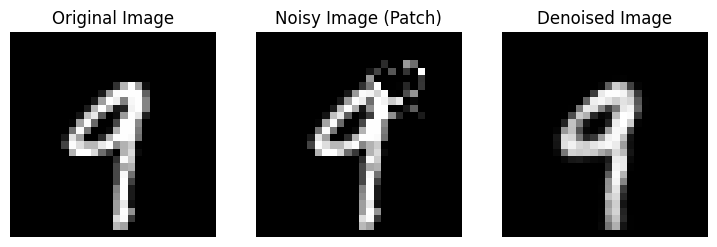

Epoch [26/30], Loss: 0.0117


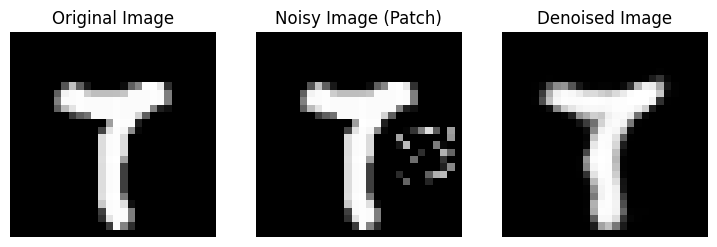

Epoch [27/30], Loss: 0.0118


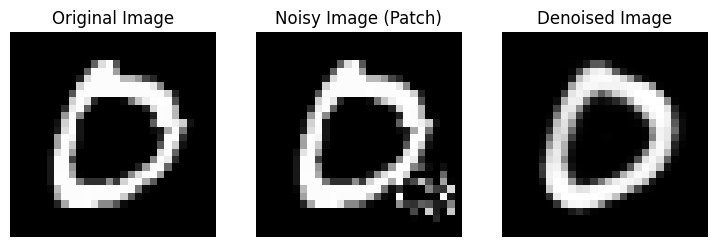

Epoch [28/30], Loss: 0.0113


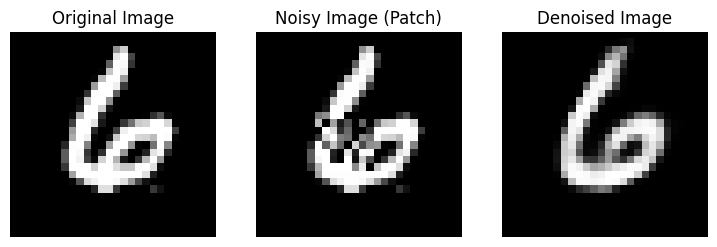

Epoch [29/30], Loss: 0.0094


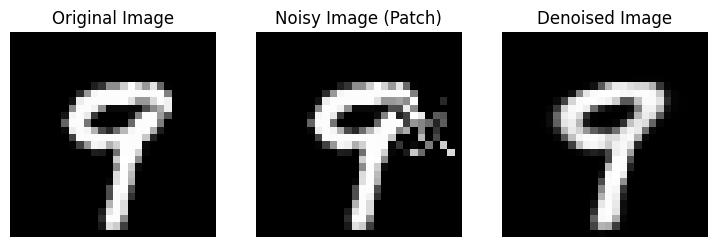

Epoch [30/30], Loss: 0.0114


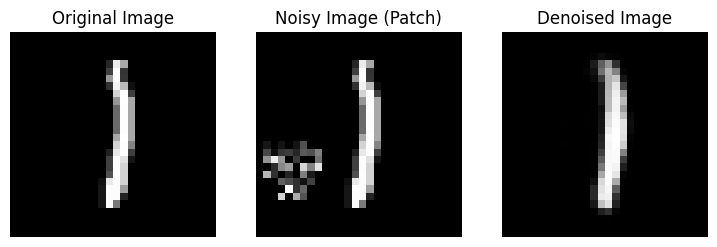

In [13]:
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data

        # Create a copy of the original images
        noisy_img = img.clone()

        # Add noise to a randomly selected 8x8 patch
        for i in range(noisy_img.size(0)):  # Iterate through each image in the batch
            x_start = torch.randint(0, 28-patch_size, (1,)).item()
            y_start = torch.randint(0, 28-patch_size, (1,)).item()
            noisy_img[i, 0, x_start:x_start+patch_size, y_start:y_start+patch_size] += 0.5 * torch.randn(patch_size, patch_size)

        noisy_img = torch.clamp(noisy_img, 0., 1.)

        # Forward pass: compute the output and loss
        output = model(noisy_img.view(-1, 28*28))
        loss = criterion(output, img.view(-1, 28*28))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Visualize the results
    with torch.no_grad():
        output = output.view(-1, 1, 28, 28)
        img = img.view(-1, 1, 28, 28)
        noisy_img = noisy_img.view(-1, 1, 28, 28)

        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(9, 3))
        axes[0].imshow(img[0].cpu().squeeze(), cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(noisy_img[0].cpu().squeeze(), cmap='gray')
        axes[1].set_title('Noisy Image (Patch)')
        axes[1].axis('off')

        axes[2].imshow(output[0].cpu().squeeze(), cmap='gray')
        axes[2].set_title('Denoised Image')
        axes[2].axis('off')

        plt.show()

---

### **Step 6:** Evaluate the Model (optional)

 After training, evaluate the model on a validation set using the same approach as in the training loop. This step helps to assess the model's performance on unseen data.

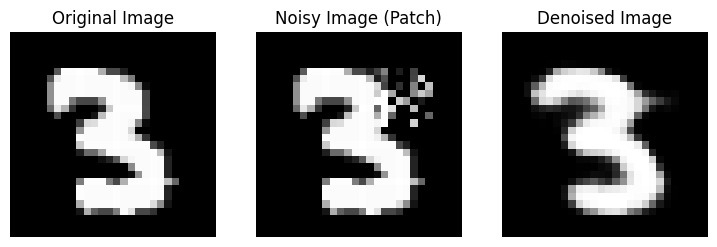

In [14]:
with torch.no_grad():
  output = output.view(-1, 1, 28, 28)
  img = img.view(-1, 1, 28, 28)
  noisy_img = noisy_img.view(-1, 1, 28, 28)

  # Plotting
  fig, axes = plt.subplots(1, 3, figsize=(9, 3))
  axes[0].imshow(img[2].cpu().squeeze(), cmap='gray')
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(noisy_img[2].cpu().squeeze(), cmap='gray')
  axes[1].set_title('Noisy Image (Patch)')
  axes[1].axis('off')

  axes[2].imshow(output[2].cpu().squeeze(), cmap='gray')
  axes[2].set_title('Denoised Image')
  axes[2].axis('off')

  plt.show()


**END**

----